<a href="https://colab.research.google.com/github/nagendraputhane/pythonLibs/blob/master/pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

**DataFrame** - A DataFrame is like an in-memory 2D table. It can be viewed as like a spreadsheet, with column names and row labels.  
**Series** - A Series object is 1D array, similar to a column in a spreadsheet, with a column name and row labels.

# Series

Creating a series

In [4]:
s = pd.Series([2, -1, 3, 5])
s

0    2
1   -1
2    3
3    5
dtype: int64

In [5]:
s + [1000, 2000, 3000, 4000] #element wise

0    1002
1    1999
2    3003
3    4005
dtype: int64

In [6]:
s + 100 #Broadcasting

0    102
1     99
2    103
3    105
dtype: int64

## Index labels
They are unique identifiers. The default value is equal to the rank of the item

In [9]:
s2 = pd.Series([68, 83, 112, 68], index = ["alice", "bob", "charles", "darwin"])
s2

alice       68
bob         83
charles    112
darwin      68
dtype: int64

loc and iloc -> To make it clear when you are accessing by label or by integer location 

In [10]:
s2.loc["bob"]

83

In [11]:
s2.iloc[1:3]

bob         83
charles    112
dtype: int64

The ambiguity that arises with numeric labels

In [21]:
surprise = pd.Series([0, 1, 2, 3, 4])
surprise

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [22]:
surprise_slice = surprise[2:] #the element with index 0 is absent
surprise_slice

2    2
3    3
4    4
dtype: int64

In [23]:
try:
  surprise_slice[0] #trying to access first element
except KeyError as e:
  print("Key error :", e)

Key error : 0


In [24]:
surprise_slice.iloc[0] #access integer location

2

In [29]:
meaning = pd.Series(42, ["life", "universe", "everything"]) #initialize a series object with a sclar and a list of index labels
meaning

life          42
universe      42
everything    42
dtype: int64

## Series name

In [26]:
s6 = pd.Series([83, 68], index = ["bob", "alice"], name = "weights")
s6

bob      83
alice    68
Name: weights, dtype: int64

## Plotting a Series

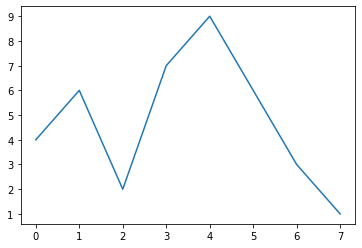

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
temperatures = [4, 6, 2, 7, 9, 6, 3, 1]
s7 = pd.Series(temperatures, name = "temperature")
s7.plot()
plt.show()